In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/kathanbhavsar/Desktop/Python,DS,ML/DATA/mushrooms.csv')

In [3]:
X = pd.get_dummies(df.drop('class',axis=1),drop_first=True)
y = df['class']

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [6]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [7]:
learning_rate = np.linspace(0,1,10)
param_grid = {'n_estimators':[50,100,200],'learning_rate':learning_rate,'max_depth':[3,4,5]}

In [8]:
model = GradientBoostingClassifier()

In [9]:
grid_model = GridSearchCV(model,param_grid,cv=5,verbose=1)

In [10]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


/Users/kathanbhavsar/Desktop/anaconda3/envs/kathan/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/kathanbhavsar/Desktop/anaconda3/envs/kathan/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kathanbhavsar/Desktop/anaconda3/envs/kathan/lib/python3.9/site-packages/sklearn/ensemble/_gb.py", line 577, in fit
    self._check_params()
  File "/Users/kathanbhavsar/Desktop/anaconda3/envs/kathan/lib/python3.9/site-pack

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [11]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

In [12]:
pred = grid_model.predict(X_test)

In [13]:
grid_model.best_params_

{'learning_rate': 0.1111111111111111, 'max_depth': 3, 'n_estimators': 200}

/Users/kathanbhavsar/Desktop/anaconda3/envs/kathan/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


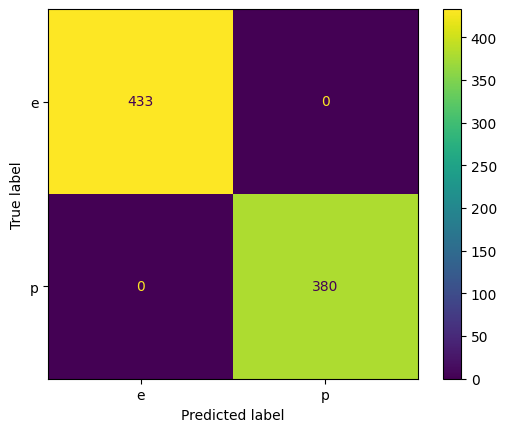

In [14]:
plot_confusion_matrix(grid_model,X_test,y_test)

In [15]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       433
           p       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [16]:
feat_import = grid_model.best_estimator_.feature_importances_

In [17]:
imp_feat = pd.DataFrame(index=X.columns,data = feat_import,columns=['Importance'])

In [18]:
imp_feat

,Importance
cap-shape_c,1.278784e-04
cap-shape_f,3.214915e-16
cap-shape_k,1.424759e-17
cap-shape_s,3.211018e-08
cap-shape_x,6.677322e-17
...,...
habitat_l,1.867249e-07
habitat_m,0.000000e+00
habitat_p,7.450700e-07
habitat_u,1.566724e-06


In [19]:
imp_feat = imp_feat[imp_feat['Importance']>0.0005].sort_values('Importance')

In [20]:
imp_feat

,Importance
odor_c,0.000850
stalk-surface-above-ring_k,0.000870
ring-number_o,0.001581
cap-surface_g,0.001636
population_c,0.002478
ring-type_n,0.002545
cap-color_y,0.002599
stalk-color-below-ring_c,0.002828
spore-print-color_u,0.003345
stalk-color-below-ring_y,0.003485


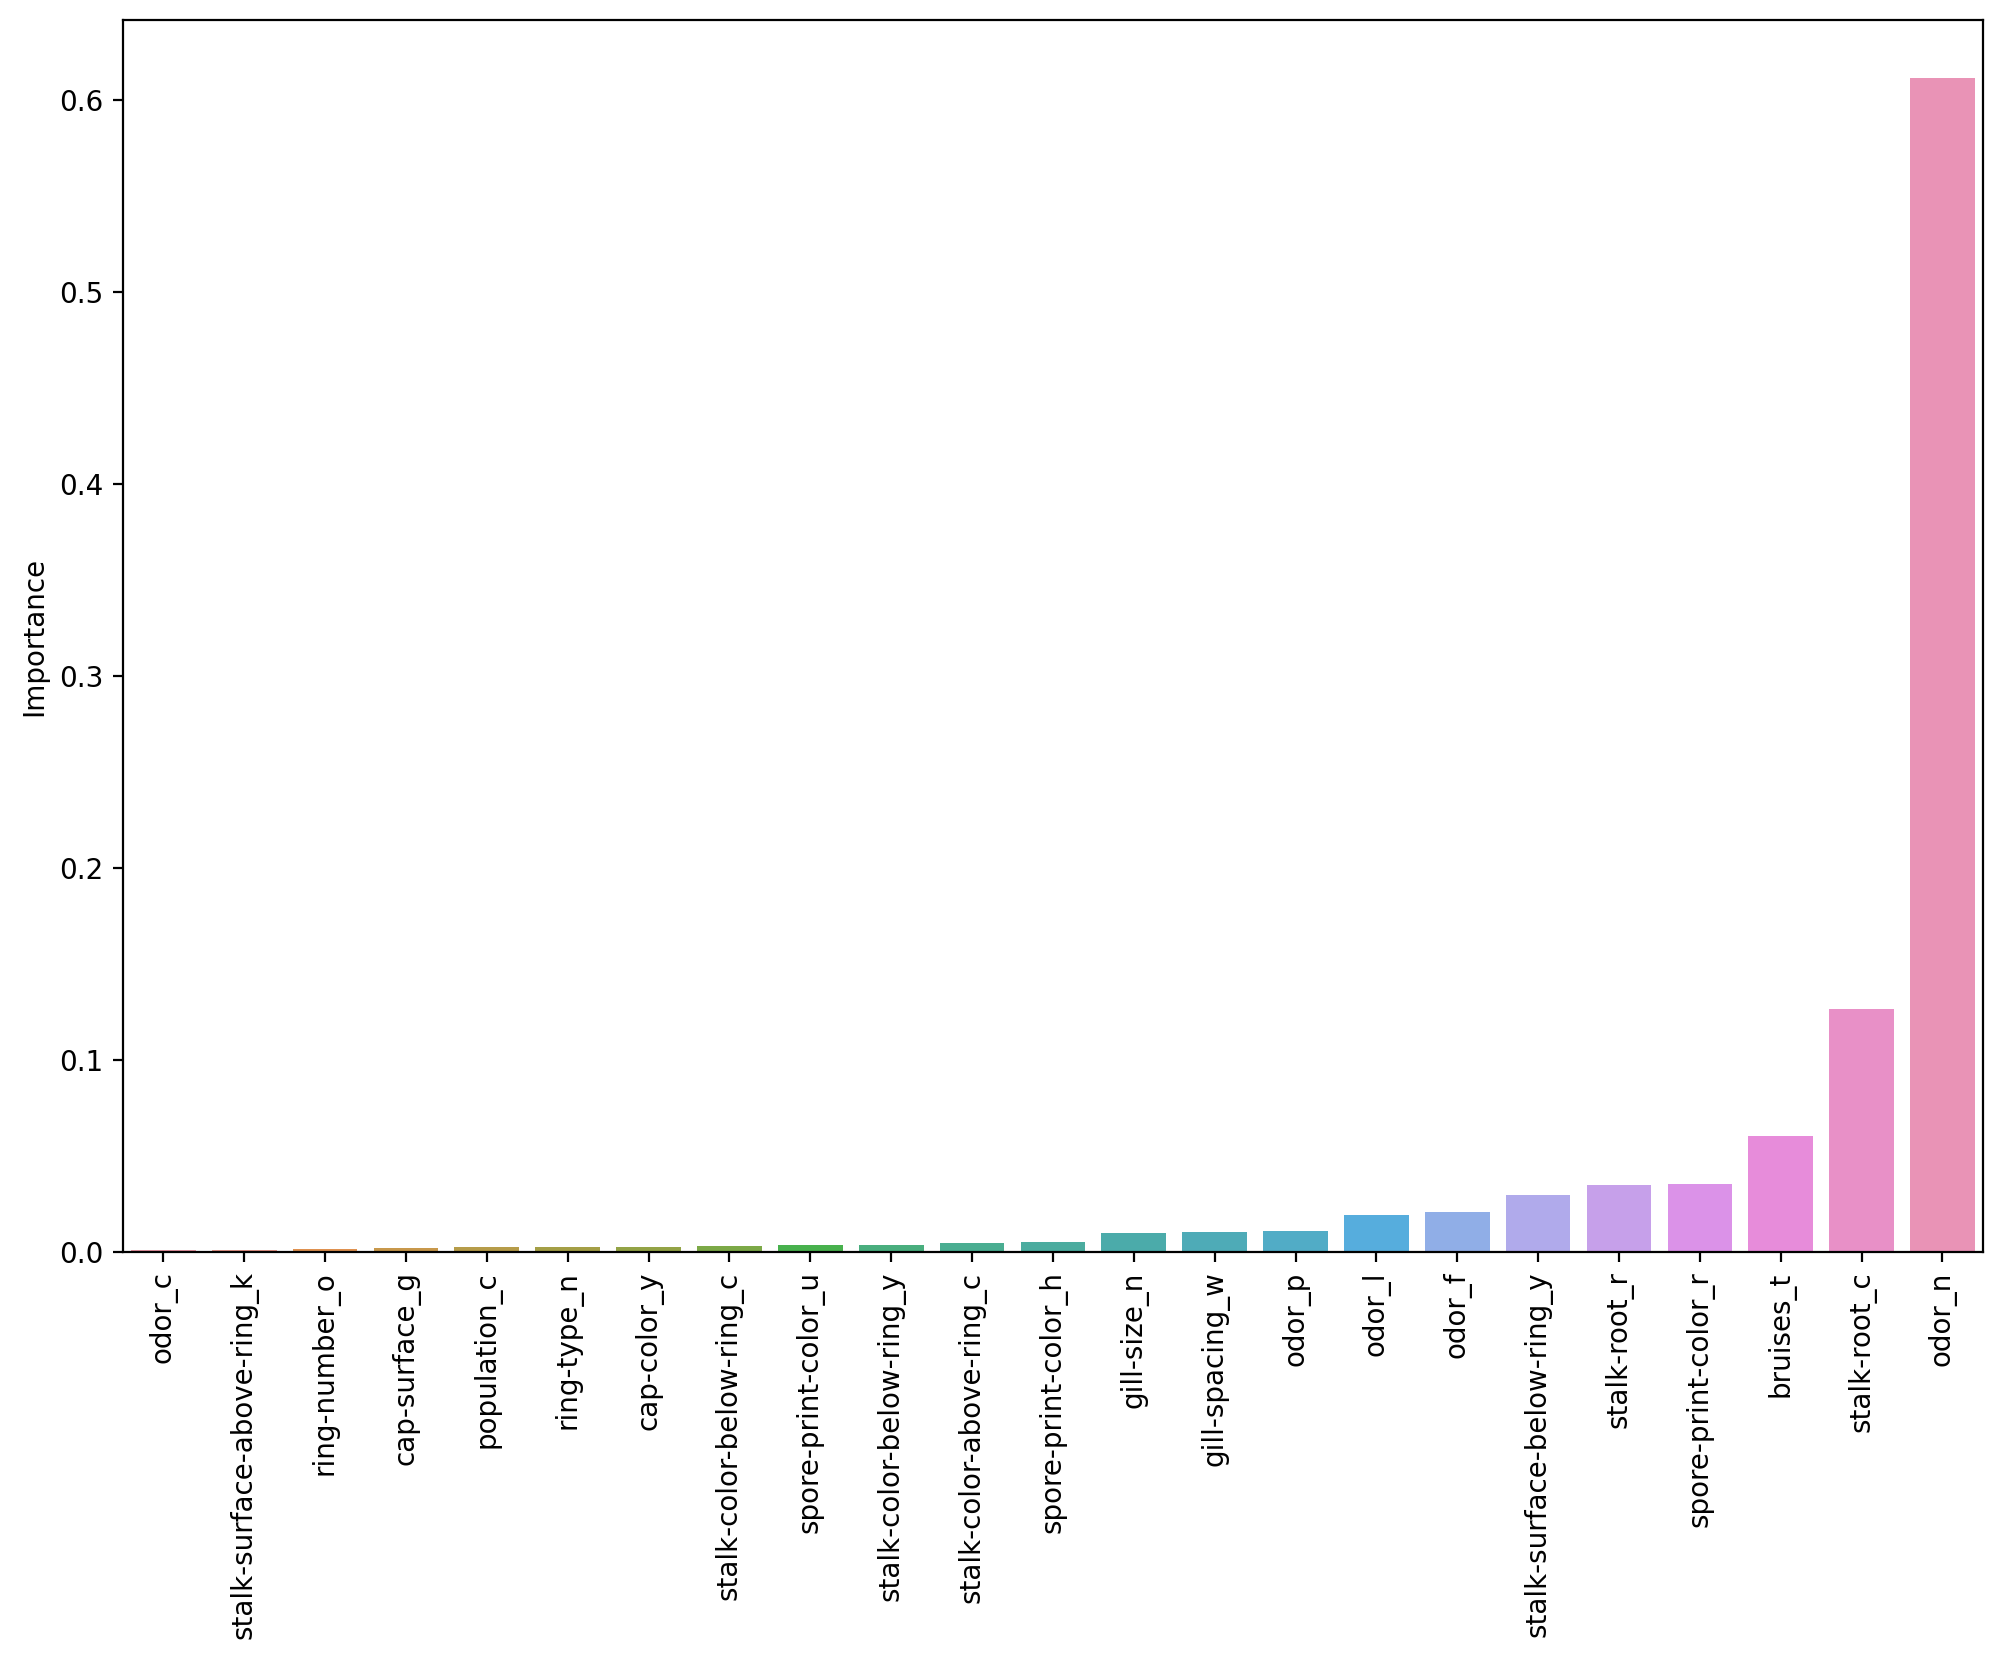

In [21]:
plt.figure(figsize=(12,8),dpi=200)
sns.barplot(data = imp_feat,x = imp_feat.index,y = 'Importance')
plt.xticks(rotation = 90);